# Learning Curves ( Ensemble vs Deepnet ) Train Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from bigml.api import BigML

In [2]:
# Select project in BigML
api = BigML(project='project/5d9b851042129f40b70001b0')

In [3]:
# Create list for ensemble, deepnet, dataset
ensemble_list = [api.get_ensemble('ensemble/5dbfeedf7811dd7f2d00f9c8'), # 10
                api.get_ensemble('ensemble/5dbfef877811dd7f2d00f9de'), # 20
                api.get_ensemble('ensemble/5dbff06c7811dd7f2d00fa20'), # 30
                api.get_ensemble('ensemble/5dbff184e476847468010dae'), # 40
                api.get_ensemble('ensemble/5dbff2715299631c820103b4'), # 50
                api.get_ensemble('ensemble/5dbff39de476847468010e1a'), # 60
                api.get_ensemble('ensemble/5dbff48ae476847468010e35'), # 70
                api.get_ensemble('ensemble/5dbff5b15299631c82010423'), # 80
                api.get_ensemble('ensemble/5dbff85fe476847468010e99'), # 90
                api.get_ensemble('ensemble/5dbffa697811dd0554001066')  # 100     
                ]

deepnet_list = [api.get_deepnet('deepnet/5dbfef0de476847468010d39'),
                api.get_deepnet('deepnet/5dbfefa97811dd0557001572'),
                api.get_deepnet('deepnet/5dbff095e476847468010d72'),
                api.get_deepnet('deepnet/5dbff1b27811dd7f2d00fa62'),
                api.get_deepnet('deepnet/5dbff2a17811dd7f2d00fa89'),
                api.get_deepnet('deepnet/5dbff3de5299631c820103ea'),
                api.get_deepnet('deepnet/5dbff4bfe476847468010e38'),
                api.get_deepnet('deepnet/5dbff5e87811dd7f2d00fae9'),
                api.get_deepnet('deepnet/5dbff9685299631c82010465'),
                api.get_deepnet('deepnet/5dbffaa27811dd7f2d00fb31')          
               ]

dataset_list = [api.get_dataset('dataset/5dbfeed3e476847468010d2a'),
                api.get_dataset('dataset/5dbfef6ee47684749e001158'),
                api.get_dataset('dataset/5dbff0515299631c82010345'),
                api.get_dataset('dataset/5dbff150e476847468010da8'),
                api.get_dataset('dataset/5dbff23d7811dd055c001608'),
                api.get_dataset('dataset/5dbff36ce4768474050009d1'),
                api.get_dataset('dataset/5dbff4715299631c820103f9'),
                api.get_dataset('dataset/5dbff5957811dd7f2d00fada'),
                api.get_dataset('dataset/5dbff83fe476847468010e96'),
                api.get_dataset('dataset/5dbffa475299631c8201046e')
               ]

## Performance de “ensemble” et de “deepnet” sur le train set

In [8]:
def data_auc(x, y):
    
    # test avec n% du train_set
    api = BigML(project="project/5d9b851042129f40b70001b0") # AUTH dans docker/auth.env
    df = pd.read_csv('csv/Train.csv', index_col=0)
    
    # split de n% du train_set
    train_split = df.head(int(len(df)*(x/100)))

    # Enregistrement csv 
    path = f"csv/train_split_{x}.csv"
    batch_path = f"csv/learning_curves/train/predictions_ensemble_train{x}_with_train.csv"
    batch_path_deep = f"csv/learning_curves/predictions_deepnet_train{x}_with_train.csv"
    
    train_split.to_csv(path)

    # Creation d'une source
    source = api.create_source(path)
    api.ok(source)
    
    # Creation d'un dataset ( = source )
    dataset_train = api.create_dataset(source)
    api.ok(dataset_train)

    # Récuperation des 80% (train set)
    train_dataset = api.get_dataset('dataset/5dbf2470e4768474680107dc')
    
    # ENSEMBLE
    
    # Création d'un modele ensemble avec les n% 
    ensemble = api.create_ensemble(dataset_train , {"objective_field" : "SeriousDlqin2yrs"})
    print(f"Création model {x}% du train_set - Ensemble")

    batch_prediction = api.create_batch_prediction(ensemble_list[y], dataset_list[y],{"header": True, "all_fields": True, "probabilities": True})
    api.ok(batch_prediction)
    api.download_batch_prediction(batch_prediction,filename=batch_path)
    
    #### AUC ENSEMBLE
    df_ens = pd.read_csv(batch_path, index_col=0)

    actual = df_ens['SeriousDlqin2yrs']
    scores = df_ens['1 probability']
    auc_ens = roc_auc_score(actual, scores)
    
    # DEEPNET
    
    # Création d'un modele Deepnet avec les n% 
    deepnet = api.create_deepnet(dataset_train , {"objective_field" : "SeriousDlqin2yrs"})
    print(f"Création model {x}% du train_set - Deepnet")

    batch_prediction_deep = api.create_batch_prediction(deepnet_list[y], dataset_list[y],{"header": True, "all_fields": True, "probabilities": True})
    api.ok(batch_prediction_deep)
    api.download_batch_prediction(batch_prediction_deep,filename=batch_path_deep)

    #### AUC Deepnet
    df_deep = pd.read_csv(batch_path_deep, index_col=0)

    actual_deep = df_deep['SeriousDlqin2yrs']
    scores_deep = df_deep['1 probability']
    auc_deep = roc_auc_score(actual_deep, scores_deep)
    
    return auc_ens, auc_deep


In [9]:
# Store AUC values in a list
x = 10
y = 0
auc_list_ens = []
auc_list_deep = []
data_amount_list = []

while x <= 100 and y <= 9 :
    auc_ens , auc_deep = data_auc(x,y)
    auc_list_ens.append(auc_ens)
    auc_list_deep.append(auc_deep)
    data_amount_list.append(x)
    x += 10
    y += 1
    


Création model 10% du train_set - Ensemble
Création model 10% du train_set - Deepnet
Création model 20% du train_set - Ensemble
Création model 20% du train_set - Deepnet
Création model 30% du train_set - Ensemble
Création model 30% du train_set - Deepnet
Création model 40% du train_set - Ensemble
Création model 40% du train_set - Deepnet
Création model 50% du train_set - Ensemble
Création model 50% du train_set - Deepnet
Création model 60% du train_set - Ensemble
Création model 60% du train_set - Deepnet
Création model 70% du train_set - Ensemble
Création model 70% du train_set - Deepnet
Création model 80% du train_set - Ensemble
Création model 80% du train_set - Deepnet
Création model 90% du train_set - Ensemble
Création model 90% du train_set - Deepnet
Création model 100% du train_set - Ensemble
Création model 100% du train_set - Deepnet


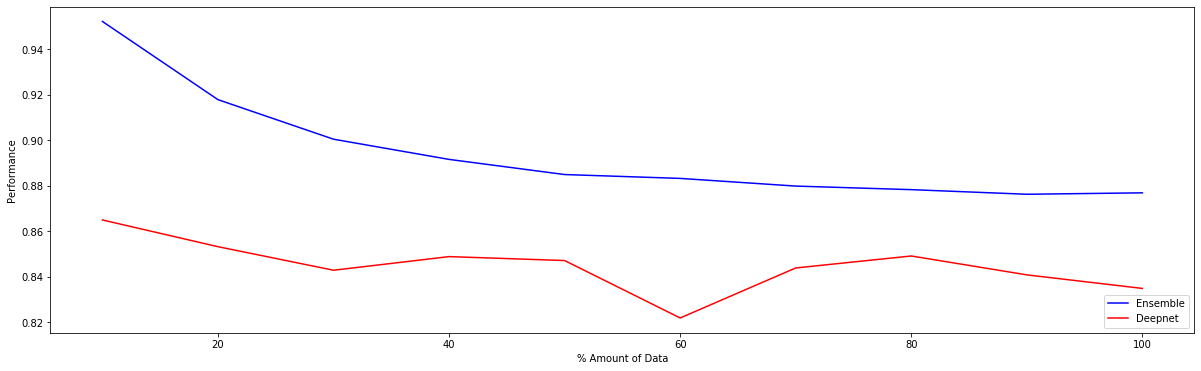

In [10]:
# Learning curves
plt.rcParams['figure.figsize'] = [20.5 , 6]
plt.xlabel("% Amount of Data")
plt.ylabel("Performance")
plt.plot(data_amount_list,auc_list_ens, color="blue", label='Ensemble')
plt.plot(data_amount_list,auc_list_deep, color="red", label='Deepnet')
plt.legend(loc="lower right")
plt.show()